In [1]:
#Importation des librairies necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation 

## 1)Nettoyage des données :

In [2]:
# importer et afficher notre dataset 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",");
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#afficher les nom s des colonnes
columns =df.columns.values
columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
#verification des types des données
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#supprimer la colonne costumer id car elle est inutile
df2 = df.iloc[:,1:]
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#vérifier s'il y a des valeurs manquantes 
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2) Transformation des données :

In [7]:
#convertir totalcharges en numérique
df2.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
#vérifier s'il ya des valeurs null
df2.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#on trouve 11 valeur Nan donc va les supprimer
df2.dropna(inplace = True)
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#convertir notre classe "churn" en valeur binaire  
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2
#Convertir toutes les variables catégorielles en variables factoriels
#df3 = pd.get_dummies(df2)
#df3.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [11]:
df3 = df2.copy()

In [12]:
#convertir la colonne "gender" en une valeur binaire 1=homme et 0=femme :

df3.gender = [1 if each == "Male" else 0 for each in df3.gender]

#convertir les autres colonnes qui contient 2 valeurs "YES/NO" à une valeur binaire "1/0"

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling']

for item in columns_to_convert:
    df3[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df3[item]]
df3 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


Il reste 4 colones catégorielles : MultipleLines / InternetService /  Contract / PaymentMethod 

Convertissez ces colonnes textuelles restantes en colonnes factices à l'aide de la fonction pandas get_dummies. 

Cette fonction crée de nouvelles colonnes nommées comme valeurs des colonnes associées avec une valeur binaire (1/0)

In [13]:
df4 = pd.get_dummies(df3)

pd.set_option('display.max_columns', None)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 no

Maintenant, notre ensemble de données ne contient que des colonnes entières et numériques binaires afin que nous puissions appliquer des modèles statistiques.

#  Data Standardization


##  **  Min-Max scaling : 

Pour chaque valeur d'une colonne , MinMaxScaler soustrait la valeur minimale de la colonne, puis divise par la plage. 


La plage correspond à la différence entre le maximum d'origine et le minimum d'origine.

In [15]:
# import the librairie
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
data = df4.copy()
scaled = scaler.fit_transform(data)
col_names = list(data.columns)
df_scaled = pd.DataFrame(scaled, columns=col_names)

In [16]:
df_scaled.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.442560,0.903299,0.535196,0.564349,0.563851,0.536974,0.584115,0.586106,0.592719,0.463166,0.261309,0.265785,0.481371,0.096701,0.421928,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.352781,0.368958,0.368708,0.353857,0.378259,0.379126,0.491363,0.299363,0.261571,0.441782,0.499688,0.295571,0.493902,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.172512,0.044155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.518408,0.159090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.712562,0.435719,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df_scaled["Churn"].describe()

count    7032.000000
mean        0.265785
std         0.441782
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [18]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   float64
 1   SeniorCitizen                            7032 non-null   float64
 2   Partner                                  7032 non-null   float64
 3   Dependents                               7032 non-null   float64
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   float64
 6   OnlineSecurity                           7032 non-null   float64
 7   OnlineBackup                             7032 non-null   float64
 8   DeviceProtection                         7032 non-null   float64
 9   TechSupport                              7032 non-null   float64
 10  StreamingTV                              7032 no

In [19]:
df_scaled.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_M

# Naîve Bayes Without Feauture Selection : 

###  1) Diviser les données en attributs et étiquettes (labes) : 

In [20]:
# diviser les données en attributs et étiquettes (labes)
Y = df_scaled.loc[:,"Churn"]
X = df_scaled.loc[:, df_scaled.columns != 'Churn']

In [21]:
Y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: Churn, Length: 7032, dtype: float64

In [22]:
X.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [23]:
#X1 = X.values
#Y1 = Y.values 

### 2)Splitting du dataset Training set and Test set (80%,20%) :

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

### 3) appliquer le model : 

In [25]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores


{'gaussian': 0.7213996965326039,
 'bernoulli': 0.7232975541526953,
 'multinomial': 0.774180169716951}

In [26]:
modele = MultinomialNB()
modele.fit(X_train, y_train)

MultinomialNB()

In [27]:
#préduction d'un échantillon
echantillon = [X_test.iloc[0, :]]
#classe_reel = y_test[0]
print ("echantillon: ", echantillon)

echantillon:  [gender                                     1.000000
SeniorCitizen                              1.000000
Partner                                    1.000000
Dependents                                 0.000000
tenure                                     0.845070
PhoneService                               1.000000
OnlineSecurity                             0.000000
OnlineBackup                               0.000000
DeviceProtection                           0.000000
TechSupport                                0.000000
StreamingTV                                0.000000
StreamingMovies                            0.000000
PaperlessBilling                           0.000000
MonthlyCharges                             0.067164
TotalCharges                               0.171123
MultipleLines_No                           0.000000
MultipleLines_No phone service             0.000000
MultipleLines_Yes                          1.000000
InternetService_DSL                        0.0000

In [28]:
#print "classe réelle: ", classe_reel
print ("classe prédite: ", modele.predict(echantillon))
print ("probabilités: ", modele.predict_proba(echantillon))

classe prédite:  [0.]
probabilités:  [[0.99747793 0.00252207]]


In [29]:
#Les prédictions
y_pred = modele.predict(X_test)

#évaluation de notre modèle
print ("précision: ", accuracy_score(y_test, y_pred))
print ("précision: ", modele.score(X_test, y_test))

précision:  0.7684659090909091
précision:  0.7684659090909091


In [30]:
# matrice de confusion
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[417  94]
 [ 69 124]]


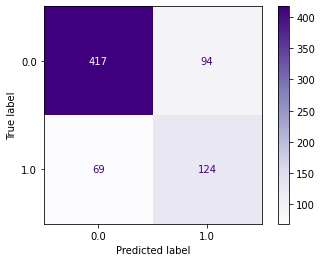

In [31]:
# plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modele, X_test, y_test, cmap="Purples")

In [32]:
# Classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       511
         1.0       0.57      0.64      0.60       193

    accuracy                           0.77       704
   macro avg       0.71      0.73      0.72       704
weighted avg       0.78      0.77      0.77       704



# Naîve Bayes With Feature Selection :

1) Forward Selection:
The procedure starts with an empty set of features . 
The best of the original features is determined and added to the reduced set.
At each subsequent iteration, the best of the remaining original attributes is added to the set.


2) Backward Elimination: 
The procedure starts with the full set of attributes.
At each step, it removes the worst attribute remaining in the set.

## 1) Sequential Forward Selection : (SFS)

In [33]:
import mlxtend

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [35]:
sfs = SFS(modele, 
          k_features=12, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X, Y)

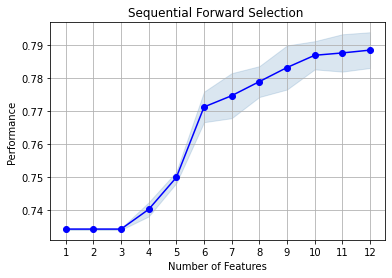

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection ')
plt.grid()
plt.show()

In [37]:
print('\nSequential Forward Selection (k=12):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=12):
(0, 1, 2, 4, 11, 12, 14, 18, 19, 21, 23, 26)
('gender', 'SeniorCitizen', 'Partner', 'tenure', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges', 'InternetService_DSL', 'InternetService_Fiber optic', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check')
CV Score:
0.78839590443686


====> the prediction score of SFS for these 12 features is  0.78839590443686 

In [38]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.7343572241183163, 0.7343572241183163, 0.734...",0.734215,"(gender,)",0.00039483,0.00024631,0.000142207
2,"(0, 1)","[0.7343572241183163, 0.7343572241183163, 0.734...",0.734215,"(gender, SeniorCitizen)",0.00039483,0.00024631,0.000142207
3,"(0, 1, 2)","[0.7343572241183163, 0.7343572241183163, 0.734...",0.734215,"(gender, SeniorCitizen, Partner)",0.00039483,0.00024631,0.000142207
4,"(0, 1, 2, 26)","[0.7406143344709898, 0.7411831626848692, 0.742...",0.740188,"(gender, SeniorCitizen, Partner, PaymentMethod...",0.00343449,0.00214257,0.00123701
5,"(0, 1, 2, 4, 26)","[0.7519908987485779, 0.7474402730375427, 0.749...",0.749858,"(gender, SeniorCitizen, Partner, tenure, Payme...",0.00276381,0.00172417,0.000995449
6,"(0, 1, 2, 4, 19, 26)","[0.7747440273037542, 0.7650739476678043, 0.768...",0.771189,"(gender, SeniorCitizen, Partner, tenure, Inter...",0.00739011,0.00461023,0.00266172
7,"(0, 1, 2, 4, 14, 19, 26)","[0.782707622298066, 0.7667804323094426, 0.7690...",0.774602,"(gender, SeniorCitizen, Partner, tenure, Total...",0.0109109,0.00680665,0.00392982
8,"(0, 1, 2, 4, 14, 19, 23, 26)","[0.7804323094425484, 0.773037542662116, 0.7764...",0.778868,"(gender, SeniorCitizen, Partner, tenure, Total...",0.00747401,0.00466257,0.00269194
9,"(0, 1, 2, 4, 14, 19, 21, 23, 26)","[0.7878270762229806, 0.7718998862343572, 0.784...",0.783134,"(gender, SeniorCitizen, Partner, tenure, Total...",0.0106799,0.00666252,0.00384661
10,"(0, 1, 2, 4, 14, 18, 19, 21, 23, 26)","[0.7844141069397043, 0.7872582480091013, 0.782...",0.786832,"(gender, SeniorCitizen, Partner, tenure, Total...",0.00683486,0.00426384,0.00246173


## 2) Sequential Backward Selection : 

In [39]:
sbs = SFS(modele, 
          k_features=12, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(X, Y)

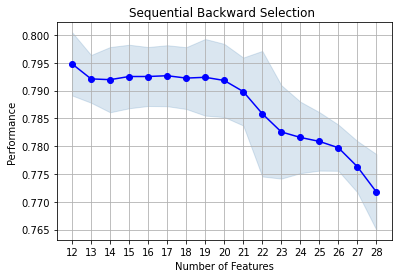

In [40]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection ')
plt.grid()
plt.show()

In [41]:
print('\nSequential Backward Selection (k=12):')
print(sbs.k_feature_idx_)
print(sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)


Sequential Backward Selection (k=12):
(1, 4, 6, 9, 11, 12, 13, 14, 19, 20, 21, 22)
('SeniorCitizen', 'tenure', 'OnlineSecurity', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year')
CV Score:
0.7947952218430034


In [42]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
28,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7718998862343572, 0.7741751990898749, 0.761...",0.771758,"(gender, SeniorCitizen, Partner, Dependents, t...",0.0109109,0.00680665,0.00392982
27,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7753128555176336, 0.7747440273037542, 0.771...",0.776308,"(gender, SeniorCitizen, Partner, Dependents, t...",0.00739011,0.00461023,0.00266172
26,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7804323094425484, 0.7810011376564278, 0.773...",0.779721,"(gender, SeniorCitizen, Dependents, tenure, Ph...",0.00664989,0.00414845,0.00239511
25,"(1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7792946530147895, 0.7844141069397043, 0.773...",0.780859,"(SeniorCitizen, Dependents, tenure, PhoneServi...",0.00841584,0.00525012,0.00303116
24,"(1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7889647326507395, 0.7838452787258248, 0.771...",0.78157,"(SeniorCitizen, Dependents, tenure, PhoneServi...",0.0102959,0.00642297,0.00370831
23,"(1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7906712172923777, 0.785551763367463, 0.7684...",0.782565,"(SeniorCitizen, Dependents, tenure, PhoneServi...",0.0134532,0.00839263,0.00484548
22,"(1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7872582480091013, 0.7912400455062572, 0.767...",0.785836,"(SeniorCitizen, Dependents, tenure, PhoneServi...",0.0180819,0.0112802,0.00651261
21,"(1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[0.7889647326507395, 0.7929465301478953, 0.780...",0.789818,"(SeniorCitizen, tenure, PhoneService, OnlineSe...",0.00978881,0.00610663,0.00352566
20,"(1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, ...","[0.7929465301478953, 0.7946530147895335, 0.781...",0.791809,"(SeniorCitizen, tenure, PhoneService, OnlineSe...",0.0105354,0.00657237,0.00379456
19,"(1, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17,...","[0.7929465301478953, 0.7969283276450512, 0.781...",0.792378,"(SeniorCitizen, tenure, PhoneService, OnlineSe...",0.0110364,0.00688494,0.00397502


## 3) Sequential Forward Floating Selection : 

In [43]:
sffs = SFS(modele, 
           k_features=12, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(X, Y)

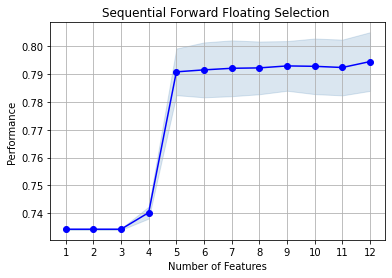

In [44]:
fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Floating Selection ')
plt.grid()
plt.show()

In [45]:
print('\nSequential Forward Floating Selection (k=12):')
print(sffs.k_feature_idx_)
print(sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)


Sequential Forward Floating Selection (k=12):
(4, 5, 6, 9, 10, 11, 13, 14, 17, 19, 21, 23)
('tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'Contract_Month-to-month', 'Contract_Two year')
CV Score:
0.7945108077360636


In [46]:
sffs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.73435722, 0.73435722, 0.73435722, 0.7337884 ]),
  'avg_score': 0.7342150170648465,
  'feature_names': ('gender',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.73435722, 0.73435722, 0.73435722, 0.7337884 ]),
  'avg_score': 0.7342150170648465,
  'feature_names': ('gender', 'SeniorCitizen')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.73435722, 0.73435722, 0.73435722, 0.7337884 ]),
  'avg_score': 0.7342150170648465,
  'feature_names': ('gender', 'SeniorCitizen', 'Partner')},
 4: {'feature_idx': (0, 1, 2, 26),
  'cv_scores': array([0.74061433, 0.74118316, 0.74232082, 0.73663254]),
  'avg_score': 0.7401877133105802,
  'feature_names': ('gender',
   'SeniorCitizen',
   'Partner',
   'PaymentMethod_Electronic check')},
 5: {'feature_idx': (4, 14, 19, 21, 23),
  'cv_scores': array([0.79920364, 0.7883959 , 0.778157  , 0.79749716]),
  'avg_score': 0.7908134243458476,
  'feature_names': ('tenure',
   'TotalCharges',
   'Intern

## 4) Sequential Backward Floating Selection : 

In [47]:
sbfs = SFS(modele,  
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X, Y)

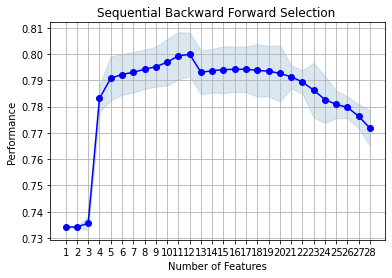

In [48]:
fig1 = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Forward Selection ')
plt.grid()
plt.show()

In [49]:
sbfs = SFS(modele, 
           k_features=12,
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X, Y)

In [50]:
print('\nSequential Backward Floating Selection (k=12):')
print(sbfs.k_feature_idx_)
print(sbfs.k_feature_names_)
print('CV Score:')
print(sbfs.k_score_)



Sequential Backward Floating Selection (k=12):
(0, 4, 11, 12, 14, 15, 18, 19, 20, 21, 22, 26)
('gender', 'tenure', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges', 'MultipleLines_No', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'PaymentMethod_Electronic check')
CV Score:
0.792235494880546


# Using the Selected Feature Subset For Making New Predictions:

In [51]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]

X_train_sfs = sbs.transform(X_train)
X_test_sfs = sbs.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
modele.fit(X_train_sfs, y_train)
y_pred = modele.predict(X_test_sfs)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

Test set accuracy: 77.56 %


In [52]:
best=pd.DataFrame(X_train_sfs,columns=sbfs.k_feature_names_)


In [53]:
import anvil.server
anvil.server.connect("6YVFJWJDW2HDIPJ5ZNLP7GUI-GEJ45UUSS5GWAWQA")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [54]:
@anvil.server.callable
def eval(gender,tenure,StreamingMovies,PaperlessBilling,TotalCharges,MultipleLines_No,InternetService_DSL,
         InternetService_Fiber_optic,InternetService_No,Contract_Month_to_month,Contract_One_year,
         PaymentMethod_Electronic_check):
    x=np.array([])
    x=np.append(x,[gender,tenure,StreamingMovies,PaperlessBilling,TotalCharges,MultipleLines_No,InternetService_DSL,
         InternetService_Fiber_optic,InternetService_No,Contract_Month_to_month,Contract_One_year,
         PaymentMethod_Electronic_check]).reshape(1,12)
    pred=modele.predict(x)
    return pred

Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Esprit\Logiciel\Anaconda\lib\site-packages\anvil\server.py", line 306, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Esprit\Logiciel\Anaconda\lib\site-packages\anvil\server.py", line 298, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Esprit\Logiciel\Anaconda\lib\site-packages\anvil\_threaded_server.py", line 403, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Esprit\Logiciel\Anaconda\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Esprit\Logiciel\Anaconda\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Esprit\Logiciel\Anaconda\lib\site-packages\a

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER
